**Creation the timelines of events and gunrelated quotations in English-speaking newspaper**

# TIMELINE

https://pretagteam.com/question/timeline-in-python
https://vizzlo.com/create/pictograph
https://insightwhale.com/how-to-visualize-frequency-distribution-best-methods/
https://towardsdatascience.com/how-to-create-interactive-map-plots-with-plotly-7b57e889239a

In [21]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import math
import json
import bz2
import urllib
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nltk
import ssl
from scipy import stats

%matplotlib inline
# sns.set(font_scale = 1.3, rc = {'figure.figsize':(10,6)})
# sns.set_palette('colorblind')
# data_folder = 'data/'

## Load the data

In [11]:
gunquotes = pd.read_json('data/quotes-2017-extended.json.bz2', lines=True, compression='bz2')
gunquotes

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,nationality,gender,occupation,age,ethnic_group,party,religion
0,2017-03-26-000661,"A big burglar, I never really knew him to carr...",Brian Andrews,"[Q2924842, Q4962982, Q4962983]",2017-03-26 17:01:19,1,"[[Brian Andrews, 0.7167], [Tony Fiore, 0.1666]...",[http://www.providencejournal.com/news/2017032...,E,[United States of America],[male],[singer],41.0,None,None,None
1,2017-08-31-083709,jumped off the balcony and got into a car in t...,Scott Jones,"[Q16240166, Q1839768, Q23024171, Q25189323, Q3...",2017-08-31 18:10:00,1,"[[Scott Jones, 0.6374], [None, 0.3361], [Rober...",[http://sfist.com/2017/08/31/hotel_roomshootou...,E,None,[male],[athletics competitor],23.0,None,None,None
2,2017-03-29-003312,a travesty with regards to not only the legisl...,Chris Cox,"[Q25206337, Q4919691, Q5106285, Q5106287, Q510...",2017-03-29 18:56:50,1,"[[Chris Cox, 0.8423], [None, 0.1517], [Asa Hut...",[http://www.guns.com/2017/03/29/sec-commish-gu...,E,None,[male],[horse trainer],NaN,None,None,None
3,2017-09-11-088873,similar rules for whether you can own a gun an...,Kris Kobach,[Q6437211],2017-09-11 22:17:52,2,"[[Kris Kobach, 0.5138], [John Lott, 0.3198], [...",[http://www.kansas.com/news/politics-governmen...,E,[United States of America],[male],[lawyer],55.0,None,[Republican Party],None
4,2017-08-10-034688,He keeps getting better each day at practice. ...,Ruffin McNeill,[Q7377923],2017-08-10 01:00:45,1,"[[Ruffin McNeill, 0.7703], [None, 0.2297]]",[http://newsok.com/marquise-overton-expected-t...,E,[United States of America],[male],"[head coach, American football player]",63.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58775,2017-07-25-041057,I do not know if such issue was discussed duri...,Bolaji Abdullahi,[Q52818781],2017-07-25 03:10:38,1,"[[Bolaji Abdullahi, 0.7587], [None, 0.2413]]",[http://www.thisdaylive.com/index.php/2017/07/...,E,[Nigeria],[male],"[politician, journalist]",52.0,[Yoruba people],[All Progressives Congress],None
58776,2017-11-30-045895,I think he will need surgery tomorrow and it's...,Mick McCarthy,"[Q40063430, Q437925]",2017-11-30 12:51:09,1,"[[Mick McCarthy, 0.8419], [None, 0.1023], [Kei...",[http://www.nottinghampost.com/sport/football/...,E,None,[male],[researcher],53.0,None,None,None
58777,2017-08-29-047666,I t's a movie about growing up and about gener...,Don Hahn,"[Q1072843, Q5292728]",2017-08-29 18:10:00,2,"[[Don Hahn, 0.8057], [None, 0.1943]]",[http://hellogiggles.com/reviews-coverage/movi...,E,[United States of America],[male],"[film producer, screenwriter, film director, a...",65.0,None,None,None
58778,2017-02-15-036379,"I yelled to my wife, `Go get the gun! '",Jim Gibbons,"[Q17411221, Q59228431, Q6195205, Q639207]",2017-02-15 16:37:10,1,"[[Jim Gibbons, 0.8571], [None, 0.1429]]",[http://freebeacon.com/issues/armed-homeowner-...,E,[United States of America],[male],[manager],NaN,None,None,None


## Gunquotes timeline per month

In [16]:
# Useful function for the following plots

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

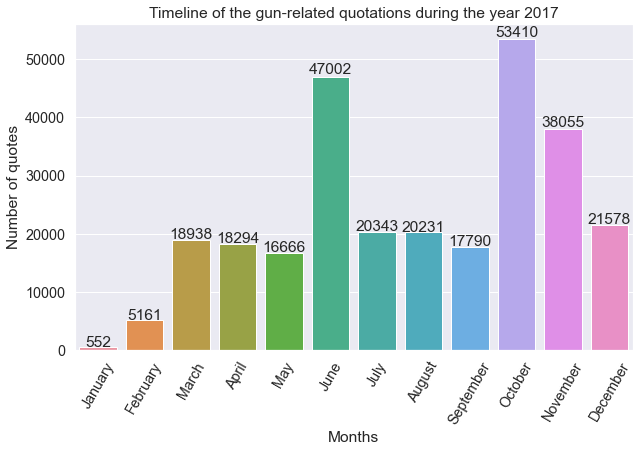

In [17]:
## Plot of the number of quotes related to guns in function of the month

gunquotes['dateWithoutTime'] = gunquotes['date'].dt.normalize()

ax = sns.barplot(x=np.linspace(1,12,12), y=gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum())#, data=gunquotes)
sns.set_color_codes("colorblind")
ax.set_xlabel('Months')
ax.set_ylabel('Number of quotes')
ax.set_title('Timeline of the gun-related quotations during the year 2017')
ax.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=60)
show_values(ax)
plt.show()

In [19]:
dates = gunquotes['date'].dt.normalize().unique()
print(dates)

['2017-03-26T00:00:00.000000000' '2017-08-31T00:00:00.000000000'
 '2017-03-29T00:00:00.000000000' '2017-09-11T00:00:00.000000000'
 '2017-08-10T00:00:00.000000000' '2017-11-19T00:00:00.000000000'
 '2017-06-08T00:00:00.000000000' '2017-10-03T00:00:00.000000000'
 '2017-08-16T00:00:00.000000000' '2017-05-13T00:00:00.000000000'
 '2017-12-11T00:00:00.000000000' '2017-11-28T00:00:00.000000000'
 '2017-03-14T00:00:00.000000000' '2017-11-04T00:00:00.000000000'
 '2017-10-26T00:00:00.000000000' '2017-05-09T00:00:00.000000000'
 '2017-10-20T00:00:00.000000000' '2017-03-10T00:00:00.000000000'
 '2017-06-20T00:00:00.000000000' '2017-11-06T00:00:00.000000000'
 '2017-10-17T00:00:00.000000000' '2017-11-18T00:00:00.000000000'
 '2017-07-30T00:00:00.000000000' '2017-08-24T00:00:00.000000000'
 '2017-03-30T00:00:00.000000000' '2017-10-10T00:00:00.000000000'
 '2017-07-22T00:00:00.000000000' '2017-10-05T00:00:00.000000000'
 '2017-05-24T00:00:00.000000000' '2017-09-04T00:00:00.000000000'
 '2017-11-17T00:00:00.000

In [108]:
dates = [date(2017, 6, 14), date(2017, 6, 22), date(2017, 10, 1), date(2017, 11, 5)]
min_date = date(2016, 11, 1)
max_date = date(2018, 2, 28)

labels = ['Congressional baseball shooting', 'Pizzagate murderer\'s sentence', 'Las Vegas shooting', 'Sutherland Springs church shooting']
# labels with associated dates
# labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

C:\Users\Estelle\AppData\Local\Temp/ipykernel_1360/1235788063.py:41: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


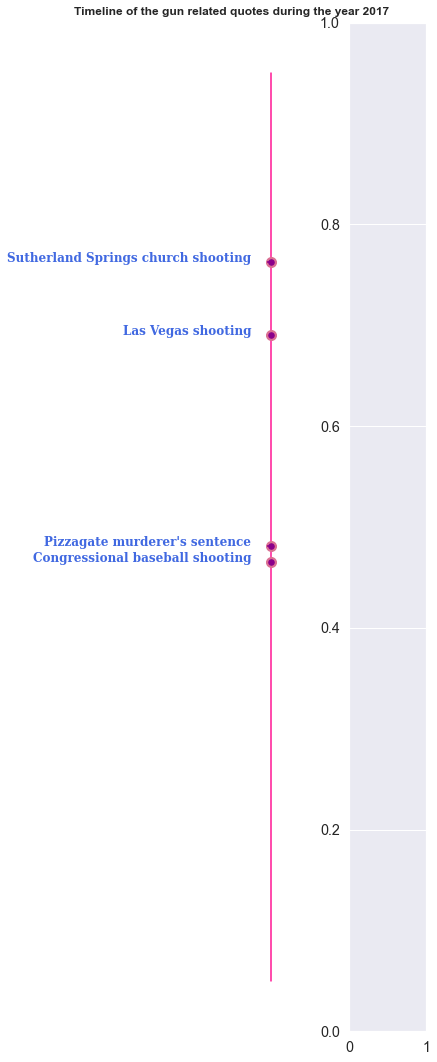

In [122]:
from datetime import timedelta


fig, ax = plt.subplots(1, 2, figsize=(6, 15), constrained_layout=True)

ax[0].set_xlim(-20, 20)
ax[0].set_ylim(min_date, max_date)
ax[0].axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)
 
ax[0].scatter(np.zeros(len(dates)), dates, s=100, c='palevioletred', zorder=2)
ax[0].scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)
ax[0].grid(False)
ax[0].axis('off')

label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -6.0
label_offsets[:] = -10.0
for i, (l, d) in enumerate(zip(labels, dates)):
#     d = d - timedelta(days=90)
    align = 'right'
#     if i % 2 == 0:
#         align = 'left'
    ax[0].text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0   
x = ax[0].hlines(dates, 0, stems, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    ax[0].spines[spine].set_visible(False)

# hide tick labels
ax[0].set_xticks([])
ax[0].set_yticks([])
 
# ax[0].set_title('Timeline of the gun related quotes during the year 2017', fontweight="bold", fontfamily='serif', fontsize=16, color='royalblue')

fig.suptitle('Timeline of the gun related quotes during the year 2017',fontweight ="bold")

fig.tight_layout()
plt.show()

In [51]:
# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/

# dates = [date(2017, 1, 15), date(2017, 2, 15), date(2017, 3, 15), date(2017, 4, 15), date(2017, 5, 15), date(2017, 6, 15),
#          date(2017, 7, 15), date(2017, 8, 15), date(2017, 9, 15), date(2017, 10, 15), date(2017, 11, 15), date(2017, 12, 15)]
dates = [date(2017, 6, 14), date(2017, 6, 22), date(2017, 10, 1), date(2017, 11, 5)]
# dates = [date(2017, 1, 1), date(2017, 12, 31)]

min_date = date(2016, 11, 1)
max_date = date(2018, 2, 28)

labels = ['Congressional baseball shooting', 'Pizzagate murderer\'s sentence', 'Las Vegas shooting', 'Sutherland Springs church shooting']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

In [107]:
fig, ax = plt.subplots(2, 1, figsize=(15, 14), constrained_layout=True)


## FIRST HISTOGRAM:
ax[0] = sns.barplot(x=np.linspace(1,12,12), y=gunquotes.groupby(gunquotes['dateWithoutTime'].dt.month).numOccurrences.sum())#, data=gunquotes)
sns.set_color_codes("colorblind")
ax[0].set_xlabel('Months')
ax[0].set_ylabel('Number of quotes')
# ax[0].set_title('Timeline of the gun-related quotations during the year 2017')
ax[0].set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=60)
show_values(ax[0])


## SECOND TIMELINE:
ax[1].set_ylim(-2, 1.75)
ax[1].set_xlim(min_date, max_date)
ax[1].axhline(0, xmin=0.05, xmax=0.95, c='darkblue', linewidth=3, zorder=1)
 
ax[1].scatter(dates, np.zeros(len(dates)), s=100, c='darkgreen', zorder=2, marker='o')
ax[1].scatter(dates, np.zeros(len(dates)), s=30, c='green', zorder=3)

ax[1].grid(False)
ax[1].axis('off')

label_offsets = np.zeros(len(dates))
label_offsets[::2] = -0.55
label_offsets[1::2] = -0.85
for i, (l, d) in enumerate(zip(labels, dates)):
    ax[1].text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)
    
stems = np.zeros(len(dates))
stems[::2] = -0.3
stems[1::2] = -0.6   
markerline, stemline, baseline = ax[1].stem(dates, stems, use_line_collection=True)
plt.setp(markerline, marker=',', color='darkmagenta')
plt.setp(stemline, color='darkgreen')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    ax[1].spines[spine].set_visible(False)

# hide tick labels
ax[1].set_xticks([])
ax[1].set_yticks([])

# ax[1].set_title('Timeline of the gun related quotes during the year 2017', fontweight="bold", fontfamily='serif', fontsize=16, 
#                  color='darkblue')

ValueError: Image size of 30454x4976419 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x1008 with 2 Axes>

In [4]:
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

In [5]:
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

In [6]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')

C:\Users\Estelle\anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


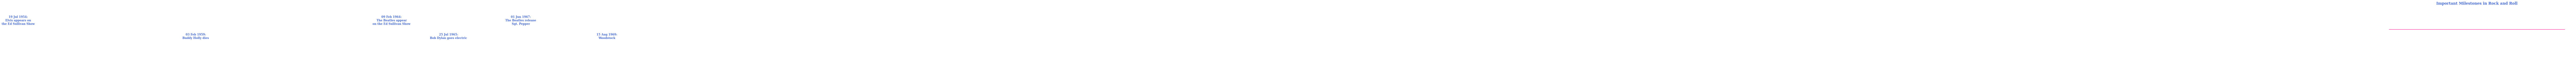

In [3]:
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
_ = ax.set_ylim(-2, 1.75)
_ = ax.set_xlim(min_date, max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)


label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)
    
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')